# Evaluations w.r.t. dimensionaly and so on

In [1]:
import numpy as np
import random

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import axis, colorbar, imshow, show, figure, subplot
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib import cm
%matplotlib inline

import os, sys, inspect
import csv

import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [2]:
save_plots = False

## Paths

In [3]:
from utils_vae_eval_paths import *

HISTORY_PATH = f'{potatonewdir}/saved_models'
PATH = MEASUREMENTS_FOLDER
FIGURES_FOLDER = FIGURES_FOLDER

## Cost Functions


### Nice Plot for Cost Function

In [4]:
# get history for choosen model:
choosen_latent = 32
history = np.load(f'{HISTORY_PATH}/latent{choosen_latent}/HISTORY.npy', allow_pickle='TRUE').item()
no_epochs = len(history['loss'])

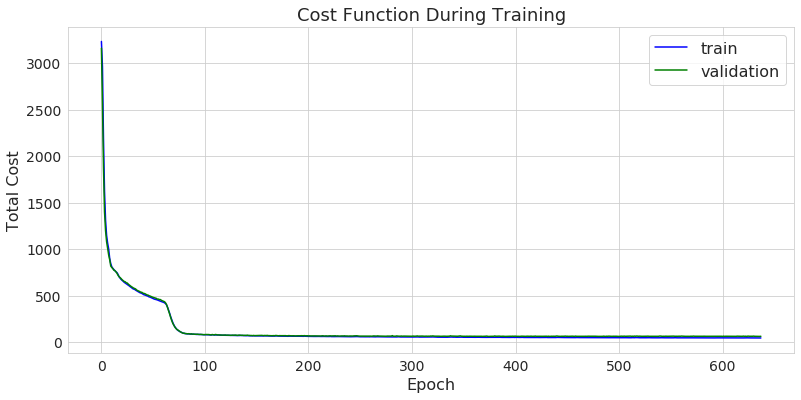

In [5]:
plt.figure(figsize=(13, 6))

# summarize history for loss:
plt.plot(history['loss'], color='blue', label='train')
#plt.plot(history['val_loss'], color='blue', alpha=0.4, label='validation')
plt.plot(history['val_loss'], color='green', label='validation')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Total Cost', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.title('Cost Function During Training', fontsize=18)

#plt.xlim(10,no_epochs)
#plt.ylim(0,1000)
#np.arange(0, no_epochs, step=10)
plt.legend(loc='upper right', fontsize=16)
plt.show()

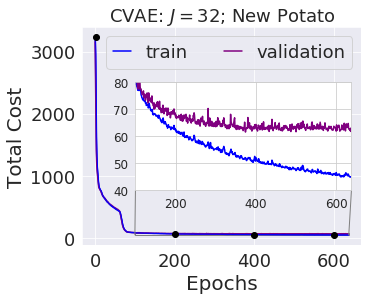

In [6]:
sns.set_style("darkgrid")
mpl.rcParams['legend.handlelength'] = 1

fig, ax = plt.subplots(figsize=(5, 4))

ax.plot(history['loss'], color='blue', label='train')
ax.plot(history['val_loss'], color='purple', label='validation')
ax.set_xlabel('Epochs', fontsize=20)
ax.set_ylabel('Total Cost', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_title(r'CVAE: $J=32$; New Potato', fontsize=18)
plt.legend(loc='upper right', ncol=2, fontsize=18)

marks = [1, 200,400,600]#,800,1000,1200,1400]
marks = [x - 1 for x in marks]
ax.plot(np.arange(1, no_epochs+1), history['loss'], c='blue', linestyle='-', lw=1, 
        markerfacecolor='black', markeredgecolor='black', marker='o', markevery=marks, label='train')

# Zoom in on data:
sns.set_style("whitegrid")
axins = inset_axes(ax, 3.0,1.5, loc=5, borderpad=1)           # zoom-factor and location (loc)
axins.plot(history['loss'], color='blue', label='train')
axins.plot(history['val_loss'], color='purple', label='validation')

x1, x2, y1, y2 = 100, no_epochs, 40, 80                         # specify the limits
axins.set_xlim(x1, x2)                                          # apply the x-limits
axins.set_ylim(y1, y2)                                          # apply the y-limits
mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")      # fancy zoom effect
axins.tick_params(axis='both', which='major', labelsize=12)

if (save_plots):
    plt.savefig(f"{FIGURES_FOLDER}/loss_vae_potatoNEW.png", dpi=300, bbox_inches='tight')
plt.show()